#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Load the dataframe

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Checking for null values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Describe the data

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are columns such as glucose, Blood pressure, skin thickness, insulin and BMI that contains zero values. These columns cannot contain zero values. Therefore, we will replace the zero values.

#### Replace the zero values with average values

In [7]:
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Exploratory Data Analysis

Create a bar chart of the value counts for the "Outcome" column to calculate the relative frequencies of the classes. Let's see relative proportion of diabetes and non diabetes

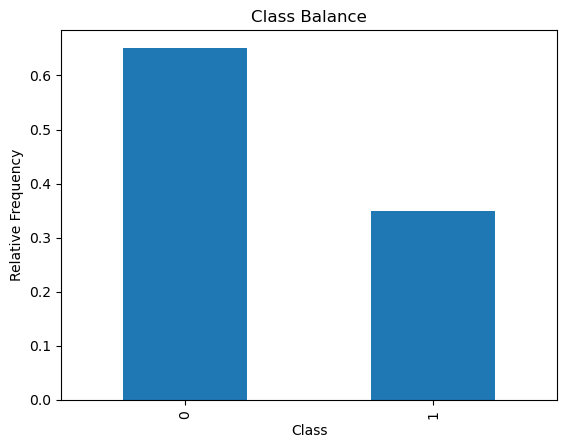

In [9]:
df["Outcome"].value_counts(normalize = True).plot(
   kind = "bar", xlabel = "Class", ylabel = "Relative Frequency", title = "Class Balance"
)
plt.show();

In [10]:
#Majority Class = 1 and minority class = 0. 
majority_class_prop, minority_class_prop = df["Outcome"].value_counts(normalize = True)
print(majority_class_prop, minority_class_prop)

0.6510416666666666 0.3489583333333333


<Axes: >

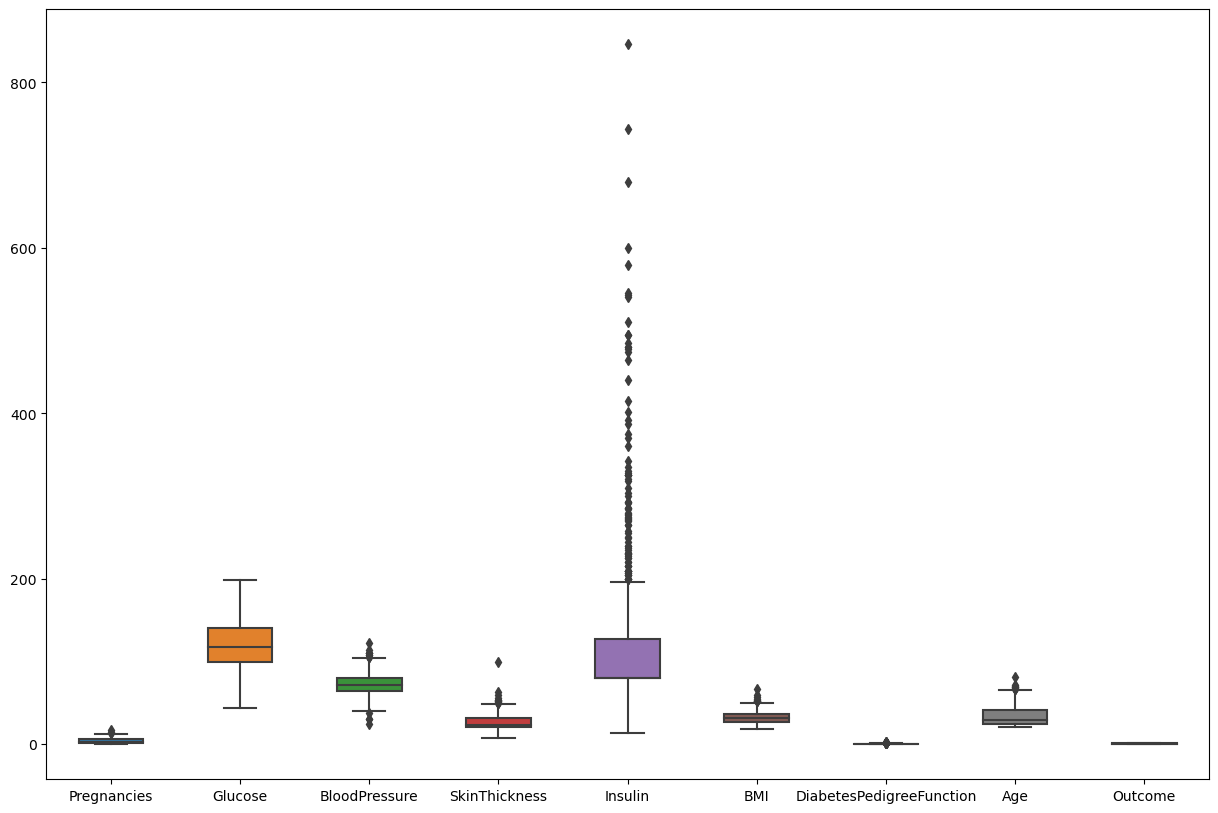

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax)

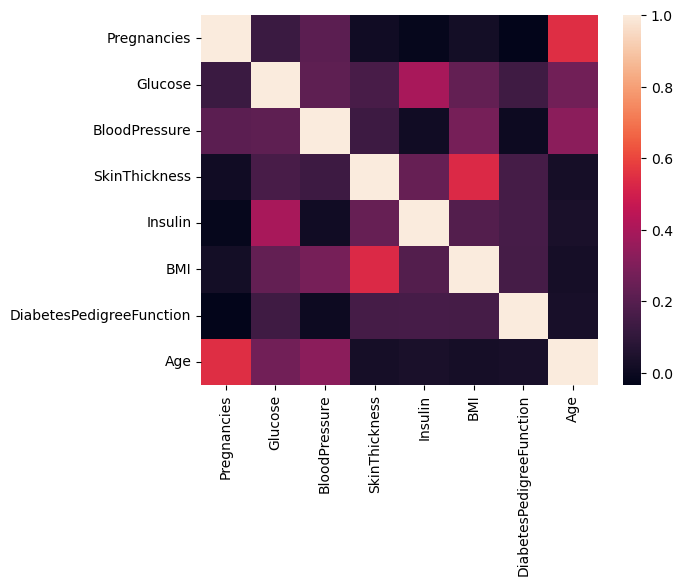

In [12]:
#Plot correlation plot
correlation = df.drop(columns = "Outcome").corr()
sns.heatmap(correlation)
plt.show()

#### Transform the data

In [13]:
target = "Outcome"
X = df.drop(columns = target)
y = df[target]

In [14]:
ScaledDT = StandardScaler()
X = ScaledDT.fit_transform(X)

#### Split the data into train and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


#### Logistics Regression

In [16]:
parameters = {
    "C":[0.01,0.1,1], #Inverse of regularization strength
    'penalty':['l2'], #Regularization penalty
    'solver':['lbfgs'] #Solver algorithm
}


lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=5)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [17]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("Train accuracy : ", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Train accuracy :  0.7703985072637611


#### Plotting the confusion matrix for logistic regression

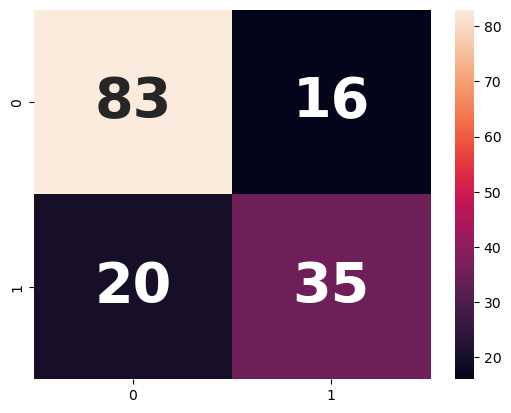

In [18]:

yhat = logreg_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

#### Calculate the accuracy on the test data

In [19]:
METHOD = []
METHOD.append(logreg_cv.score(X_test, y_test))
print("Test Accuracy is {}".format(logreg_cv.score(X_test, y_test)))

Test Accuracy is 0.7662337662337663


#### Decision Trees

In [20]:
#use this to get the depth and number of nodes
Tree = DecisionTreeClassifier(random_state=42)
Tree = Tree.fit(X_train, y_train)

In [21]:
# Calculate the number of nodes and the maximum actual depth
Tree.tree_.node_count, Tree.tree_.max_depth

(227, 13)

In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,7)],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [23]:
tree_cv = GridSearchCV(tree, parameters, cv = 5)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("Train accuracy :", tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Train accuracy : 0.7622284419565508


#### Plotting the confusion matrix for Decision Tree

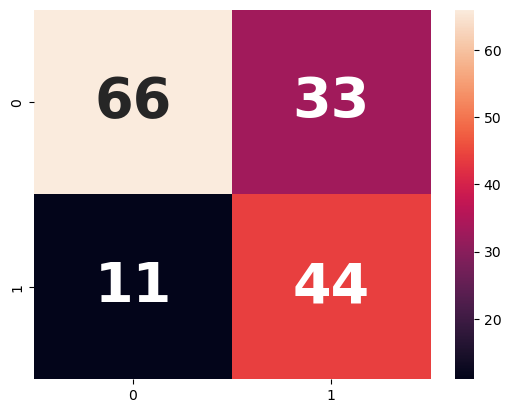

In [25]:
yhat = tree_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

#### Calculate the accuracy on the test data

In [26]:
METHOD.append(tree_cv.score(X_test, y_test))
print("Test Accuracy is {}".format(tree_cv.score(X_test, y_test)))

Test Accuracy is 0.7142857142857143


#### KNearest

In [27]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

KNN = KNeighborsClassifier()

In [28]:
knn_cv = GridSearchCV(KNN, parameters, cv = 5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [29]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("Train accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
Train accuracy : 0.7704118352658936


#### Plotting the confusion matrix for Knearest

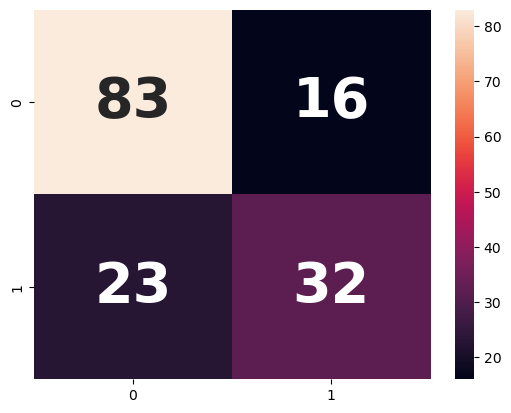

In [30]:
yhat = knn_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

#### Calculate the accuracy on the test data

In [31]:
METHOD.append(knn_cv.score(X_test, y_test))
print("Test Accuracy is {}".format(knn_cv.score(X_test, y_test)))

Test Accuracy is 0.7467532467532467


#### Random Forest

In [32]:
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [2*n + 1 for n in range(10)],              
              'max_depth' : [2*n + 1 for n in range(5)],
              'max_features':["sqrt", "log2"]}

RF = RandomForestClassifier()

In [33]:
RF_cv = GridSearchCV(RF, param_grid, cv = 5, scoring='accuracy')
RF_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [34]:
print("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)
print("Train accuracy :", RF_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 7}
Train accuracy : 0.7752632280421166


#### Plotting the confusion matrix for Random forest

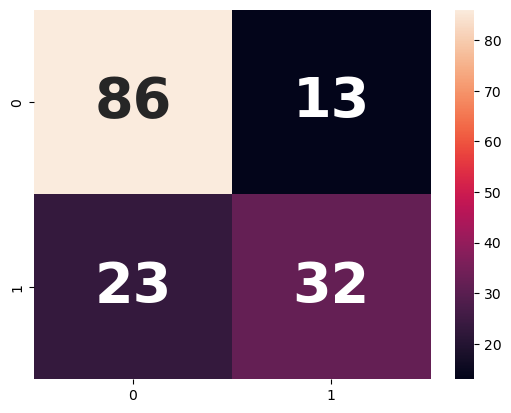

In [35]:
yhat = RF_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

#### Calculate the accuracy on the test data

In [36]:
METHOD.append(RF_cv.score(X_test, y_test))
print("Test Accuracy is {}".format(RF_cv.score(X_test, y_test)))

Test Accuracy is 0.7662337662337663


#### Model result in data frame

In [37]:
Results = pd.DataFrame({    
    "Methods" : ["Logistic Regression", "Decision Tree", "KNN", "Random Forest"],    
    "Train Accuracy" : [logreg_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_, RF_cv.best_score_],
    "Test_Accuracy": METHOD   
})
Results

,Methods,Train Accuracy,Test_Accuracy
0,Logistic Regression,0.770399,0.766234
1,Decision Tree,0.762228,0.714286
2,KNN,0.770412,0.746753
3,Random Forest,0.775263,0.766234


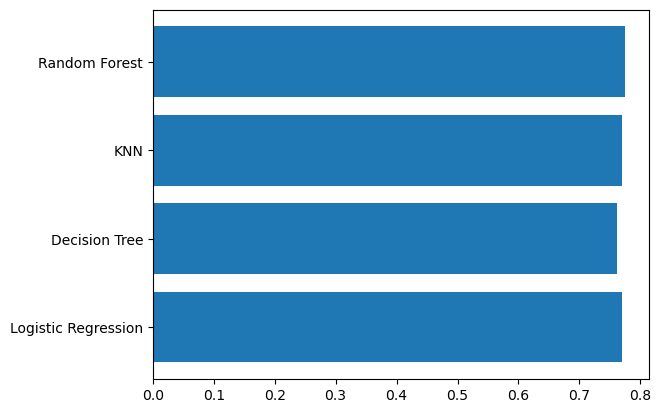

In [38]:
y = ["Logistic Regression", "Decision Tree", "KNN", "Random Forest"]
x = [logreg_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_, RF_cv.best_score_]

plt.barh(y = y, width = x)
plt.show()

#### Conclusion

Random forest seems to yield the best result when compared to other models in consideration. 